<a href="https://colab.research.google.com/github/ChibykeOS/Electricity_Price_Prediction/blob/main/Electricity_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Predict electricity prices using the dataset from "electricity_price_dataset.csv".

## Load the data

### Subtask:
Load the dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the first 5 rows.



In [1]:
import pandas as pd

# Load the dataset from the provided URL
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

/tmp/ipython-input-1-1503867512.py:4: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv')


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [2]:
# Display data types of each column
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic statistics:")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


## Preprocess the data

### Subtask:
Handle missing values, convert data types, and prepare features for modeling.

In [4]:
# Address the DtypeWarning by specifying data types for relevant columns
# We will convert columns with mixed types to numeric, coercing errors to NaN
cols_to_numeric = [
    'ForecastWindProduction',
    'SystemLoadEA',
    'SMPEA',
    'ORKTemperature',
    'ORKWindspeed',
    'CO2Intensity',
    'ActualWindProduction',
    'SystemLoadEP2',
    'SMPEP2'
]
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert the 'DateTime' column to datetime objects
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

# Handle missing values in 'Holiday' column - we can fill with 'None' as it indicates no holiday
# Using the recommended approach instead of inplace=True
df['Holiday'] = df['Holiday'].fillna('None')

# Check for missing values again after handling
print("Missing values after handling:")
print(df.isnull().sum())

# Display data types after conversion
print("\nData types after conversion:")
print(df.info())

Missing values after handling:
DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 no

### Subtask: Handle remaining missing values

In [5]:
# Impute remaining missing numerical values with the mean
for col in cols_to_numeric:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Check for missing values again after imputation
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64


## Feature Engineering

### Subtask:
Create new features from the 'DateTime' column.

In [6]:
# Extract time-based features from the 'DateTime' column
df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.dayofweek
df['dayofyear'] = df['DateTime'].dt.dayofyear
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year

# Display the first few rows with the new features
display(df.head())

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,...,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2,hour,dayofweek,dayofyear,month,year
0,2011-11-01 00:00:00,None,0,1,44,1,11,2011,0,315.31,...,9.3,600.71,356.0,3159.60,54.32,0,1,305,11,2011
1,2011-11-01 00:30:00,None,0,1,44,1,11,2011,1,321.80,...,11.1,605.42,317.0,2973.01,54.23,0,1,305,11,2011
2,2011-11-01 01:00:00,None,0,1,44,1,11,2011,2,328.57,...,11.1,589.97,311.0,2834.00,54.23,1,1,305,11,2011
3,2011-11-01 01:30:00,None,0,1,44,1,11,2011,3,335.60,...,9.3,585.94,313.0,2725.99,53.47,1,1,305,11,2011
4,2011-11-01 02:00:00,None,0,1,44,1,11,2011,4,342.90,...,11.1,571.52,346.0,2655.64,39.87,2,1,305,11,2011


## Split the data

### Subtask:
Split the dataset into training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# We will drop the original DateTime and Holiday columns as we have extracted relevant features
# We also drop the original Day, Month, Year, DayOfWeek, WeekOfYear, PeriodOfDay columns as we have created new time-based features
# The target variable is 'SMPEP2' (electricity price)
X = df.drop(['DateTime', 'Holiday', 'Day', 'Month', 'Year', 'DayOfWeek', 'WeekOfYear', 'PeriodOfDay', 'SMPEP2'], axis=1)
y = df['SMPEP2']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (30411, 14) (30411,)
Testing set shape (X_test, y_test): (7603, 14) (7603,)


## Choose and Train the model

### Subtask:
Train a LightGBM regressor model on the training data.

In [8]:
import lightgbm as lgb

# Initialize the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model on the training data
lgb_model.fit(X_train, y_train)

print("LightGBM model trained successfully!")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1880
[LightGBM] [Info] Number of data points in the train set: 30411, number of used features: 14
[LightGBM] [Info] Start training from score 64.215527
LightGBM model trained successfully!


## Evaluate the model

### Subtask:
Evaluate the trained model on the testing data.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 12.02
Root Mean Squared Error (RMSE): 23.24


## Investigate Outliers

### Subtask:
Visualize the target variable and key features to identify outliers or high-variance data points.

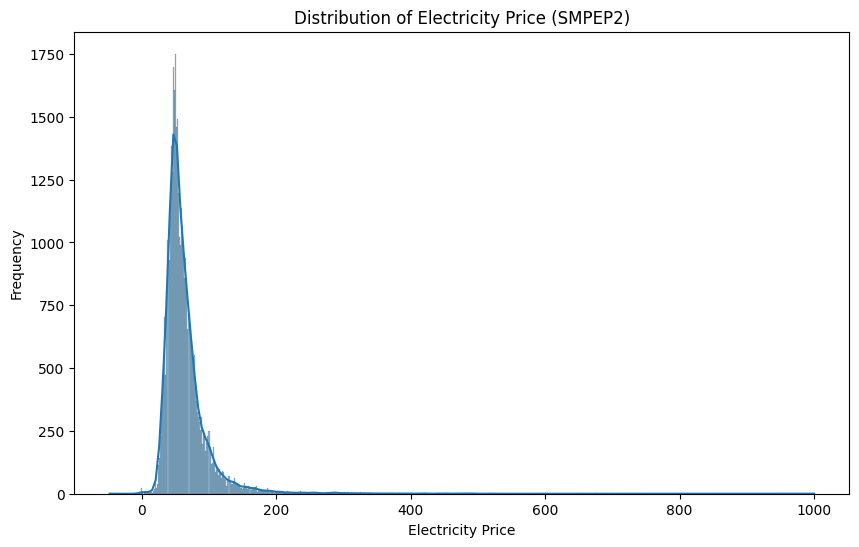

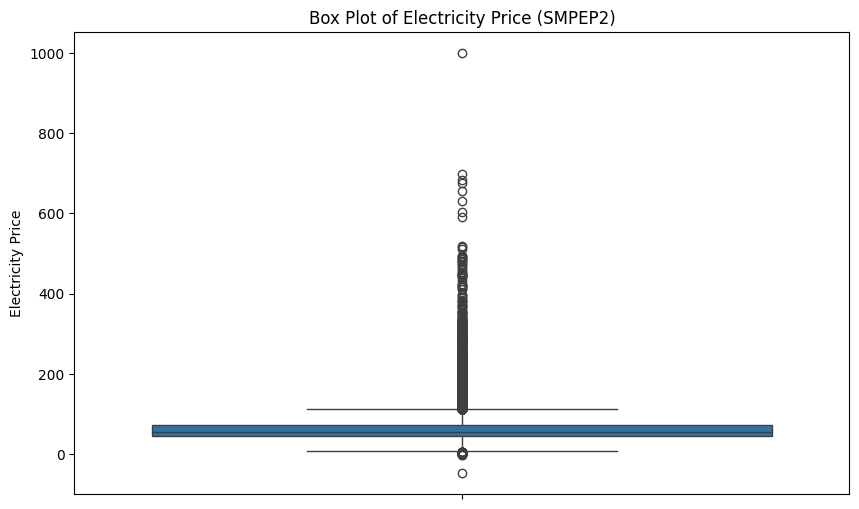

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable ('SMPEP2')
plt.figure(figsize=(10, 6))
sns.histplot(df['SMPEP2'], kde=True)
plt.title('Distribution of Electricity Price (SMPEP2)')
plt.xlabel('Electricity Price')
plt.ylabel('Frequency')
plt.show()

# Visualize a box plot of the target variable to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['SMPEP2'])
plt.title('Box Plot of Electricity Price (SMPEP2)')
plt.ylabel('Electricity Price')
plt.show()

# You can also visualize key features for outliers, for example:
# sns.boxplot(y=df['SystemLoadEP2'])
# plt.title('Box Plot of SystemLoadEP2')
# plt.ylabel('System Load EP2')
# plt.show()

# sns.boxplot(y=df['ActualWindProduction'])
# plt.title('Box Plot of ActualWindProduction')
# plt.ylabel('Actual Wind Production')
# plt.show()

## Apply Log Transformation to Target Variable

### Subtask:
Apply a log transformation to the target variable (SMPEP2) in the training and testing sets.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


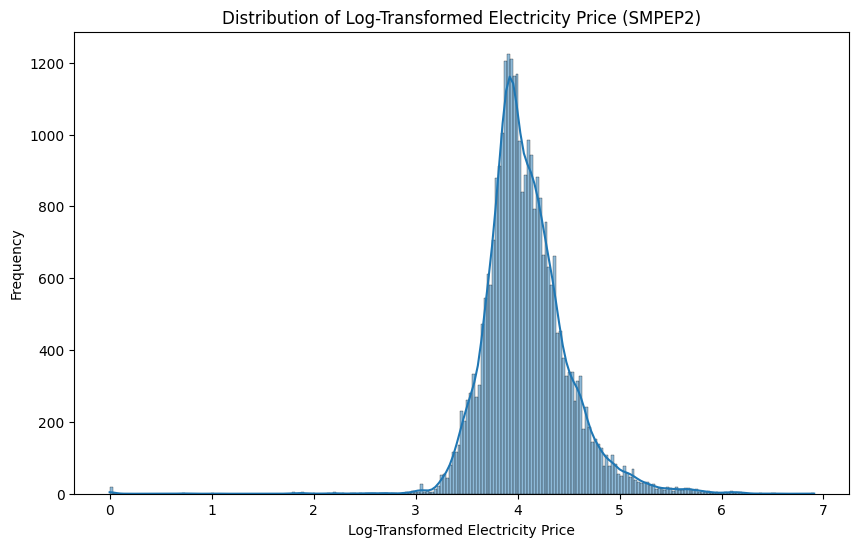

Log transformation applied to y_train and y_test.


In [11]:
import numpy as np

# Apply log transformation to the target variable (adding 1 to handle potential zero values)
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Display the distribution of the transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train_transformed, kde=True)
plt.title('Distribution of Log-Transformed Electricity Price (SMPEP2)')
plt.xlabel('Log-Transformed Electricity Price')
plt.ylabel('Frequency')
plt.show()

print("Log transformation applied to y_train and y_test.")

In [12]:
# Check for non-finite values in y_train and y_test
print("Non-finite values in y_train:", y_train[~np.isfinite(y_train)].sum())
print("Non-finite values in y_test:", y_test[~np.isfinite(y_test)].sum())

Non-finite values in y_train: 0.0
Non-finite values in y_test: 0.0


## Retrain Model with Log-Transformed Target

### Subtask:
Train the LightGBM regressor model using the log-transformed target variable.

In [13]:
# Initialize the LightGBM Regressor model
lgb_model_transformed = lgb.LGBMRegressor(random_state=42)

# Train the model on the training data with the transformed target
lgb_model_transformed.fit(X_train, y_train_transformed)

print("LightGBM model trained successfully with log-transformed target!")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1880
[LightGBM] [Info] Number of data points in the train set: 30411, number of used features: 14
[LightGBM] [Info] Start training from score 4.085977
LightGBM model trained successfully with log-transformed target!


## Evaluate Model with Log-Transformed Target

### Subtask:
Evaluate the retrained model on the testing data, inverse transforming predictions.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the testing data using the model trained on the transformed target
y_pred_transformed = lgb_model_transformed.predict(X_test)

# Inverse transform the predictions back to the original scale
# We use np.expm1 which is the inverse of np.log1p
y_pred_original_scale = np.expm1(y_pred_transformed)

# Calculate evaluation metrics on the original scale
mae_transformed = mean_absolute_error(y_test, y_pred_original_scale)
rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))

print(f"Mean Absolute Error (MAE) with log transformation: {mae_transformed:.2f}")
print(f"Root Mean Squared Error (RMSE) with log transformation: {rmse_transformed:.2f}")

Mean Absolute Error (MAE) with log transformation: 11.41
Root Mean Squared Error (RMSE) with log transformation: 23.44


## Hyperparameter Tuning with Cross-Validation

### Subtask:
Perform cross-validation and hyperparameter tuning for the LightGBM model.

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage
    'num_leaves': [31, 63],           # Maximum tree leaves for the base learner
    'max_depth': [-1, 10, 20]         # Maximum tree depth for the base learner
}

# Initialize the LightGBM Regressor model
lgb_model_tuned = lgb.LGBMRegressor(random_state=42)

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model_tuned, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=kf, verbose=1, n_jobs=-1)

# Perform GridSearchCV on the training data
# We will use the original y_train for tuning as GridSearchCV handles the scoring internally
# If we were using a custom scoring function that required the inverse transform,
# we would need to adjust accordingly.
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Best parameters found: {best_params}")
print(f"Best RMSE found during cross-validation: {best_rmse:.2f}")

# Train the final model with the best parameters
final_lgb_model = lgb.LGBMRegressor(**best_params, random_state=42)
final_lgb_model.fit(X_train, y_train)

print("\nFinal LightGBM model trained with best parameters!")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1880
[LightGBM] [Info] Number of data points in the train set: 30411, number of used features: 14
[LightGBM] [Info] Start training from score 64.215527
Best parameters found: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 63}
Best RMSE found during cross-validation: 22.70
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1880
[LightGBM] [Info] Number of data points in the train set: 30411, number of used features: 14
[LightGBM] [Info] Start training from score 64.215527

Final LightGBM model trained with best

## Evaluate Tuned Model

### Subtask:
Evaluate the tuned LightGBM model on the testing data.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the testing data using the final tuned model
y_pred_tuned = final_lgb_model.predict(X_test)

# Calculate evaluation metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Mean Absolute Error (MAE) with tuned model: {mae_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE) with tuned model: {rmse_tuned:.2f}")

Mean Absolute Error (MAE) with tuned model: 9.87
Root Mean Squared Error (RMSE) with tuned model: 21.91


## Visualize Tuned Model Predictions

### Subtask:
Visualize the actual electricity prices and the tuned model's predictions.

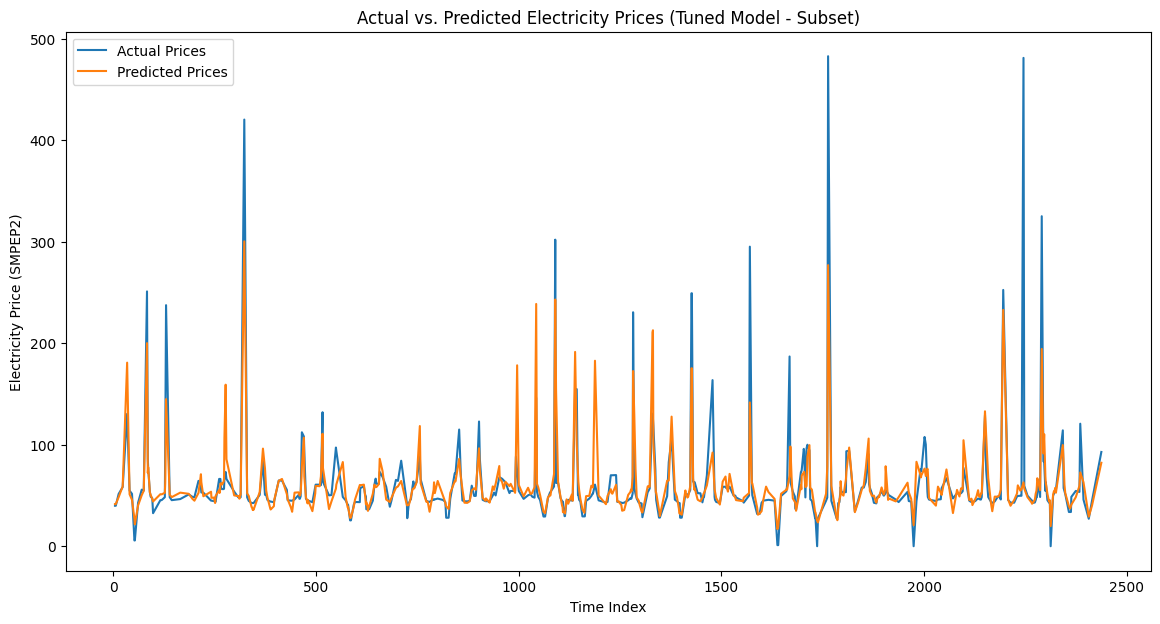

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to easily plot actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tuned})

# Sort by DateTime if available and relevant, or by index
results_df = results_df.sort_index()


# Visualize actual vs. predicted prices (plotting a subset for clarity if the test set is large)
plt.figure(figsize=(14, 7))
plt.plot(results_df['Actual'].head(500), label='Actual Prices')
plt.plot(results_df['Predicted'].head(500), label='Predicted Prices')
plt.title('Actual vs. Predicted Electricity Prices (Tuned Model - Subset)')
plt.xlabel('Time Index')
plt.ylabel('Electricity Price (SMPEP2)')
plt.legend()
plt.show()

# You could also visualize a scatter plot of Actual vs. Predicted
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x='Actual', y='Predicted', data=results_df)
# plt.title('Actual vs. Predicted Electricity Prices (Tuned Model)')
# plt.xlabel('Actual Prices')
# plt.ylabel('Predicted Prices')
# plt.show()

# Task
Perform electricity price prediction using the dataset at "https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv". Build and evaluate a stacked ensemble model to improve prediction performance.

## Define base models

### Subtask:
Choose a few diverse models to serve as base predictors (e.g., a Linear Regression, a Ridge Regression, and a tuned LightGBM or XGBoost).


**Reasoning**:
Instantiate the chosen base models (Linear Regression, Ridge Regression, and tuned LightGBM) and store them for later use.



In [18]:
from sklearn.linear_model import LinearRegression, Ridge
import lightgbm as lgb

# Instantiate the base models
linear_regression_model = LinearRegression()
ridge_regression_model = Ridge(random_state=42)
lgbm_base_model = lgb.LGBMRegressor(**best_params, random_state=42)

# Store the models in a list
base_models = [
    ('Linear Regression', linear_regression_model),
    ('Ridge Regression', ridge_regression_model),
    ('LightGBM', lgbm_base_model)
]

print("Base models instantiated and stored.")

Base models instantiated and stored.


## Train base models and generate out-of-fold predictions

### Subtask:
Train each base model on the training data using cross-validation. Generate out-of-fold predictions for the training data and predictions for the test data. These out-of-fold predictions will form the training data for the meta-model.


**Reasoning**:
Train each base model using cross-validation, generate out-of-fold predictions for the training data and predictions for the test data, and store them for the meta-model.



In [19]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
n_splits = 5

# Initialize a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create empty arrays to store out-of-fold predictions for training and predictions for testing
oof_train_preds = np.zeros((X_train.shape[0], len(base_models)))
test_preds = np.zeros((X_test.shape[0], len(base_models)))

# Iterate through each base model
for i, (name, model) in enumerate(base_models):
    print(f"Training {name} using cross-validation...")

    # Iterate through the folds
    for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
        print(f"  Fold {fold+1}/{n_splits}")

        # Split the training data into training and validation sets for the current fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model on the training set of the current fold
        model.fit(X_train_fold, y_train_fold)

        # Generate predictions on the validation set of the current fold
        oof_train_preds[val_index, i] = model.predict(X_val_fold)

    # Train the model on the entire training dataset after cross-validation
    model.fit(X_train, y_train)

    # Generate predictions on the test dataset
    test_preds[:, i] = model.predict(X_test)

print("\nOut-of-fold training predictions and test predictions generated.")

Training Linear Regression using cross-validation...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Training Ridge Regression using cross-validation...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Training LightGBM using cross-validation...
  Fold 1/5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1882
[LightGBM] [Info] Number of data points in the train set: 24328, number of used features: 14
[LightGBM] [Info] Start training from score 64.320924
  Fold 2/5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1878
[LightGBM] [Info] Number of data points in the train set: 24329, number of used features: 14
[LightGBM] [Info] Start

## Train meta-model

### Subtask:
Train a meta-model (e.g., a Linear Regression or a simple tree-based model) on the out-of-fold predictions from the base models.


**Reasoning**:
Train a Linear Regression model as the meta-model using the out-of-fold predictions as features and the original training target as the target.



In [20]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model as the meta-model
meta_model = LinearRegression()

# Train the meta-model using the out-of-fold predictions (oof_train_preds)
# as features and the original training target (y_train) as the target
meta_model.fit(oof_train_preds, y_train)

print("Meta-model (Linear Regression) trained successfully!")

Meta-model (Linear Regression) trained successfully!


## Make final predictions

### Subtask:
Use the trained base models to make predictions on the test data, and then use the meta-model to make final predictions based on the base models' test predictions.


**Reasoning**:
Use the trained meta-model to make predictions on the test data using the base models' test predictions as input.



In [21]:
# Use the trained meta_model to make final predictions on the test data
# The input to the meta-model is the test_preds array (predictions of base models on the test data)
final_predictions = meta_model.predict(test_preds)

# Print a confirmation message
print("Final predictions generated using the meta-model.")

Final predictions generated using the meta-model.


## Evaluate stacked model

### Subtask:
Evaluate the performance of the stacked model on the original test data using appropriate metrics.


**Reasoning**:
Evaluate the performance of the stacked model on the original test data using MAE and RMSE.



In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_stacked = mean_absolute_error(y_test, final_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_stacked = np.sqrt(mean_squared_error(y_test, final_predictions))

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) of Stacked Model: {mae_stacked:.2f}")
print(f"Root Mean Squared Error (RMSE) of Stacked Model: {rmse_stacked:.2f}")

Mean Absolute Error (MAE) of Stacked Model: 10.06
Root Mean Squared Error (RMSE) of Stacked Model: 21.94


## Summary:

### Data Analysis Key Findings

*   Three base models (Linear Regression, Ridge Regression, and a tuned LightGBM) were successfully instantiated for the stacked ensemble.
*   Out-of-fold predictions for the training data and predictions for the test data were generated for each base model using 5-fold cross-validation.
*   A Linear Regression model was trained as the meta-model using the out-of-fold predictions from the base models as features.
*   Final predictions were generated on the test data by feeding the base model test predictions into the trained meta-model.
*   The stacked ensemble model achieved a Mean Absolute Error (MAE) of 10.06 and a Root Mean Squared Error (RMSE) of 21.94 on the test data.

### Insights or Next Steps

*   Compare the performance of the stacked model (MAE: 10.06, RMSE: 21.94) against the individual base models to confirm if stacking provided a performance improvement.
*   Experiment with different meta-models (e.g., Ridge, ElasticNet, or a simple tree model) and potentially a larger set of diverse base models to further optimize the stacked ensemble's performance.


## Train base models and generate out-of-fold predictions

### Subtask:
Train each base model on the training data using cross-validation. Generate out-of-fold predictions for the training data and predictions for the test data. These out-of-fold predictions will form the training data for the meta-model.

**Reasoning**:
Train each base model using cross-validation, generate out-of-fold predictions for the training data and predictions for the test data, and store them for the meta-model.

In [23]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
n_splits = 5

# Initialize a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create empty arrays to store out-of-fold predictions for training and predictions for testing
oof_train_preds = np.zeros((X_train.shape[0], len(base_models)))
test_preds = np.zeros((X_test.shape[0], len(base_models)))

# Iterate through each base model
for i, (name, model) in enumerate(base_models):
    print(f"Training {name} using cross-validation...")

    # Iterate through the folds
    for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
        print(f"  Fold {fold+1}/{n_splits}")

        # Split the training data into training and validation sets for the current fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model on the training set of the current fold
        model.fit(X_train_fold, y_train_fold)

        # Generate predictions on the validation set of the current fold
        oof_train_preds[val_index, i] = model.predict(X_val_fold)

    # Train the model on the entire training dataset after cross-validation
    model.fit(X_train, y_train)

    # Generate predictions on the test dataset
    test_preds[:, i] = model.predict(X_test)

print("\nOut-of-fold training predictions and test predictions generated.")

Training Linear Regression using cross-validation...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Training Ridge Regression using cross-validation...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Training LightGBM using cross-validation...
  Fold 1/5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1882
[LightGBM] [Info] Number of data points in the train set: 24328, number of used features: 14
[LightGBM] [Info] Start training from score 64.320924
  Fold 2/5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1878
[LightGBM] [Info] Number of data points in the train

## Train meta-model

### Subtask:
Train a meta-model (e.g., a Linear Regression or a simple tree-based model) on the out-of-fold predictions from the base models.

**Reasoning**:
Train a Linear Regression model as the meta-model using the out-of-fold predictions as features and the original training target as the target.

In [24]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model as the meta-model
meta_model = LinearRegression()

# Train the meta-model using the out-of-fold predictions (oof_train_preds)
# as features and the original training target (y_train) as the target
meta_model.fit(oof_train_preds, y_train)

print("Meta-model (Linear Regression) trained successfully!")

Meta-model (Linear Regression) trained successfully!


## Make final predictions

### Subtask:
Use the trained base models to make predictions on the test data, and then use the meta-model to make final predictions based on the base models' test predictions.

**Reasoning**:
Use the trained meta-model to make predictions on the test data using the base models' test predictions as input.

In [25]:
# Use the trained meta_model to make final predictions on the test data
# The input to the meta-model is the test_preds array (predictions of base models on the test data)
final_predictions = meta_model.predict(test_preds)

# Print a confirmation message
print("Final predictions generated using the meta-model.")

Final predictions generated using the meta-model.


## Evaluate stacked model

### Subtask:
Evaluate the performance of the stacked model on the original test data using appropriate metrics.

**Reasoning**:
Evaluate the performance of the stacked model on the original test data using MAE and RMSE.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae_stacked = mean_absolute_error(y_test, final_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_stacked = np.sqrt(mean_squared_error(y_test, final_predictions))

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) of Stacked Model: {mae_stacked:.2f}")
print(f"Root Mean Squared Error (RMSE) of Stacked Model: {rmse_stacked:.2f}")

Mean Absolute Error (MAE) of Stacked Model: 10.06
Root Mean Squared Error (RMSE) of Stacked Model: 21.94
